# CSE 252A Computer Vision I Fall 2019 - Homework 4
## Instructor: Ben Ochoa
### Assignment published on: Tuesday, November 05, 2019
### Due on: Tuesday, November 19, 2019 11:59 pm

## Instructions
* Review the academic integrity and collaboration policies on the course website.
  * This assignment must be completed individually.
* All solutions must be written in this notebook.
  * This includes the theoretical problems, for which you **must** write your answers in Markdown cells (using LaTeX when appropriate).
  * Programming aspects of the assignment must be completed using Python in this notebook.
* If you want to modify the skeleton code, you may do so. It has only been provided as a framework for your solution.
* You may use Python packages (such as NumPy and SciPy) for basic linear algebra, but you may not use packages that directly solve the problem.
  * If you are unsure about using a specific package or function, then ask the instructor and/or teaching assistants for clarification.
* You must submit this notebook exported as a PDF. You must also submit this notebook as `.ipynb` file.
  * Submit both files (`.pdf` and `.ipynb`) on Gradescope.
  * **You must mark the PDF pages associated with each question in Gradescope. If you fail to do so, we may dock points.**
* It is highly recommended that you begin working on this assignment early.
* **Late policy: assignments submitted late will receive a 15% grade reduction for each 12 hours late (i.e., 30% per day). Assignments will not be accepted 72 hours after the due date. If you require an extension (for personal reasons only) to a due date, you must request one as far in advance as possible. Extensions requested close to or after the due date will only be granted for clear emergencies or clearly unforeseeable circumstances.**

## Problem 1: Epipolar Geometry [4 pts]
Consider two cameras whose image planes are the z=1 plane, and whose focal points are at (-12, 0, 0) and (12, 0, 0). We''ll call a point in the first camera (x, y), and a point in the second camera (u, v). Points in each camera are relative to the camera center. So, for example if (x, y) = (0, 0), this is really the point (-12, 0, 1) in world coordinates, while if (u, v) = (0, 0) this is the point (12, 0, 1).
![fig1](fig/fig1.png)

a) Suppose the points (x, y) = (8, 7) is matched to the point (u, v) = (2, 7). What is the 3D location of this point?

b) Compute the Essential Matrix.

c) Consider points that lie on the line x + z = 2, y = 0. Use the same stereo set up as before. Write an analytic expression giving the disparity of a point on this line after it projects onto the two images, as a function of its position in the right image. So your expression should only involve the variables u and d (for disparity). Your expression only needs to be valid for points on the line that are in front of the cameras, i.e. with z > 1.

ANSWER TO PROBLEM 1 (a):

I will use notation in Jean Ponce's book and define them when appropriately.

Let ${}^{W}P = (X, Y, Z, 1)^T$ be the homogenous coordinate of a point $P$ wrt the world coordinate frame $(W)$. 

Let ${}^{C}p = (x, y, 1)^T$ be the homogenous coordinate of the projection of ${}^{W}P$ onto the image plane wrt to the camera coordinate frame $(C)$.

Their relation is: ${}^{C}p = \frac{1}{Z} M {}^{W}P$ where $M$ is a 3 by 4 matrix. (Equation 1.16 in the book).

M is defined as $M = K (R \quad t)$.

where $K$ is the internal calibration matrix of the camera and $R, t$ represents the rigid transformation from $(W)$ to $(C)$.

Let $M_1$ be the homogenous perspective projection of a point ${}^{W}P$ to ${}^{C_1}p$, where $(C_1)$ is the coordinate system associated with camera 1. Define the subscript similarly for other objects.

In this question, because the image plan is the $z=1$ plane, it is the normalized image plan. We also assume that $\alpha = \beta = 1, \theta = 90^o, x_0 = y_0 = 0$, thus $K_1$ is the 3 by 3 identity matrix.

By visual inspection, we can see that $R_1$ is the 3 by 3 identity matrix and $t_1 = (12, 0, 0)^T$. Thus $M_1 = K_1(R_1 \quad t_1) = \begin{bmatrix} 1 & 0 & 0 & 12 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \end{bmatrix}$.

To double check, we need to make sure that the point $(-12, 0, 1, 1)^T$ is projected to $(0, 0, 1)^T$.

$\begin{bmatrix} 1 & 0 & 0 & 12 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \end{bmatrix} \begin{bmatrix} -12 \\ 0 \\ 1 \\ 1 \end{bmatrix} = (0, 0, 1)^T$.

By similar logic, $M_2 = \begin{bmatrix} 1 & 0 & 0 & - 12 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \end{bmatrix}$.

Let $p = (8, 7, 1)^T$ and $p' = (2, 7, 1)^T$. Let the 3D location of this point be ${}^{W}P$.

Then, to find ${}^{W}P$, we need to solve:

$\left( \begin{array} { l } { \left[  p _ { \times } \right] M_1 } \\ { \left[  p  _ { \times } ^ { \prime } \right]  M_2  } \end{array} \right) {}^{W}P = 0$ (Section 7.2 in the book).

where $\left[ \begin{array} { l l } { \boldsymbol { a } _ { \times } } \end{array} \right] \stackrel { \text { def } } { = } \left( \begin{array} { c c c } { 0 } & { - a _ { 3 } } & { a _ { 2 } } \\ { a _ { 3 } } & { 0 } & { - a _ { 1 } } \\ { - a _ { 2 } } & { a _ { 1 } } & { 0 } \end{array} \right)$

$\left[  p _ { \times } \right] M_1 = \begin{bmatrix} 0 & -1 & 7 \\ 1 & 0 & -8 \\ -7 & 8 & 0 \end{bmatrix} \begin{bmatrix} 1 & 0 & 0 & 12 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \end{bmatrix} = \begin{bmatrix} 0 & -1 & 7 & 0 \\ 1 & 0 & -8 & 12 \\ -7 & 8 & 0 & -84 \end{bmatrix}$

$\left[  p _ { \times } ^ { \prime } \right] M_2 = \begin{bmatrix} 0 & -1 & 7 \\ 1 & 0 & -2 \\ -7 & 2 & 0 \end{bmatrix} \begin{bmatrix} 1 & 0 & 0 & - 12 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \end{bmatrix} = \begin{bmatrix} 0 & -1 & 7 & 0 \\ 1 & 0 & -2 & -12 \\ -7 & 2 & 0 & 84 \end{bmatrix}$.

Thus, we need to solve for ${}^{W}P$ in:

$\begin{bmatrix} 0 & -1 & 7 & 0 \\ 1 & 0 & -8 & 12 \\ -7 & 8 & 0 & -84 \\ 1 & 0 & -2 & -12 \\ -7 & 2 & 0 & 84 \end{bmatrix} {}^{W}P = 0$

This is a homogenous systems of equations $A{}^{W}P=0$ in ${}^{W}P$. We solve it using the methods described in section 22.1.2 in the book, which imposes the additional constraint that the norm of the variable is 1. The value of the variable is then the eigenvector associated with the smallest eigenvalues of $A^TA$.

In [7]:
import numpy as np

A = np.stack((
    [0, -1, 7, 0], 
    [1, 0, -8, 12],
    [-7, 8, 0, -84],
    [1, 0, -2, -12],
    [-7, 2, 0, 84],
))

ATA = np.matmul(A.T, A)

w, v = np.linalg.eig(ATA)

min_lambda_idx = np.argmin(w)

P = v[min_lambda_idx] / v[min_lambda_idx][-1]

print('P in homogenous coordiate is', P)

P in homogenous coordiate is [4.03719338 5.71309611 0.24819848 1.        ]


FINISHED ANSWERING PROBLEM 1 (a)

ANSWER TO PROBLEM 1 (b):

$E = [ t_\times ] R$

where:

$t $ is the coordinate vector of the translation separating the 2 coordinates systems of the two cameras.

$ R $ is the rotation matrix such that a free vector $w$ in the coordinate system of camera 2 has coordinate $ R  w$ in the coordinate system of the first camera.

By visual inspection, we have:

$ t  = (12, 0, 0)^T - (-12, 0, 0)^T = (24, 0, 0)^T$.

$ R $ is the 3 by 3 identity matrix.

Thus:

$E = [ t_\times ] R =  \left( \begin{array} { c c c } { 0 } & { 0 } & { 0 } \\ { 0 } & { 0 } & { - 24 } \\ { 0 } & { 24 } & { 0 } \end{array} \right)$


FINISHED ANSWERING PROBLEM 1 (b)

ANSWER TO PROBLEM 1 (c):

The point on the line is represented by ${}^{W}P = (x, 0, 2-x, 1)$ with $2-x > 1$.

${}^{C_1} p_1 = \dfrac{1}{Z} M_1 {}^{W}P = \begin{bmatrix} 1 & 0 & 0 & 12 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \end{bmatrix} (x, 0, 2-x, 1)^T = (\dfrac{x+12}{2-x}, 0, 1)^T$

${}^{C_2} p_2 = \dfrac{1}{Z} M_2 {}^{W}P = \begin{bmatrix} 1 & 0 & 0 & - 12 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \end{bmatrix} (x, 0, 2-x, 1)^T = (\dfrac{x-12}{2-x}, 0, 1)^T$

Let $u = \dfrac{x-12}{2-x}$ and solve for $x$, we have $x = \dfrac{2u+12}{u+1}$.

$\dfrac{x+12}{2-x} = \dfrac{\dfrac{2u+12}{u+1} + 12}{2 - \dfrac{2u+12}{u+1}} = \dfrac{-7u-12}{5}$.

Disparity $d = \dfrac{-7u-12}{5} - u = \dfrac{-12}{5} (u+1)$

FINISHED ANSWERING PROBLEM 1 (c)

## Problem 2: Epipolar Rectification [4 pts]
In stereo vision, image rectification is a common preprocessing step to simplify the problem of finding
matching points between images. The goal is to warp image views such that the epipolar lines are
horizontal scan lines of the input images. Suppose that we have captured two images $I_A$ and $I_B$ from
identical calibrated cameras separated by a rigid transformation

$_{A}^{B}\textrm{T}= \begin{bmatrix}
\boldsymbol{R} & \boldsymbol{t} \\ 
0^T & 1
\end{bmatrix}$ and $\boldsymbol{t}=[t_x,t_y,t_z]$

Without loss of generality assume that camera A's optical center is positioned at the origin and that its optical axis is in the direction of the z-axis.

From the lecture, a rectifying transform for each image should map the epipole to a point infinitely far away in the horizontal direction $ H_{A}e_{A} = H_{B}e_{B} = [1, 0, 0]^T$. Consider the following special cases:

a) Pure horizontal translation $\boldsymbol{t} = [t_{x}, 0, 0]^T$, $\boldsymbol{R} = \boldsymbol{I}$

b) Pure translation orthogonal to the optical axis $\boldsymbol{t} = [t_{x}, t_{y}, 0]^T$, $\boldsymbol{R} = \boldsymbol{I}$

c) Pure translation along the optical axis $\boldsymbol{t} = [0, 0, t_{z}]^T$, $\boldsymbol{R} = \boldsymbol{I}$

d) Pure rotation $\boldsymbol{t} = [0, 0, 0]^T$, $\boldsymbol{R}$ is an arbitrary rotation matrix

For each of these cases, determine whether or not epipolar rectification is possible. Include the following information for each case:

(i) The epipoles $e_A$ and $e_B$

(ii) The equation of the epipolar line $l_B$ in $I_B$ corresponding to the point $[x_A, y_A, 1]^T$ in $I_A$ (if one exists)

(iii) A plausible solution to the rectifying transforms $H_A$ and $H_B$ (if one exists) that attempts to minimize distortion (is as close as possible to a 2D rigid transformation). Note that the above 4 cases are special cases; a simple solution should become apparent by looking at the epipolar lines.

One or more of the above rigid transformations may be a degenerate case where rectification is not
possible or epipolar geometry does not apply. If so, explain why.

ANSWERING PART a)

$F = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -t_x \\ 0 & t_x & 0 \end{bmatrix} $

i)

<!-- $F = [t_\times ] R = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & - t_x \\ 0 & t_x & 0 \end{bmatrix} $ -->

To find $e_A$, we need to solve $F^T e_A = 0$. Thus $e_A = (1, 0, 0)^T$.

To find $e_B$, we need to solve $F e_B = 0$. Thus $e_B = (1, 0, 0)^T$.

ii)

The equation is $F^T [t_{x}, t_{y}, 1]^T = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & - t_x \\ 0 & t_x & 0 \end{bmatrix}  [t_{x}, t_{y}, 1]^T = [0, -t_x, t_{x} t_{y}]^T$

iii)

To find $H_A $, we need to solve $H_A (1, 0, 0)^T = (1, 0, 0)^T$, thus $H_A$ can be the 3 by 3 identity matrix, which is the preferred choice since it incurs no distortion.

Similarly, $H_B$ is also the 3 by 3 identity matrix

FINISHED ANSWERING PART a)

ANSWERING PART b)

i)

$F = \begin{bmatrix} 0 & 0 & t_y \\ 0 & 0 & -t_x \\ - t_y & t_x & 0 \end{bmatrix} $

The formula for $F$ was derived from t cross R. I am sorry I did not type set this out. For some reason, there was a Latex problem when I tried to typeset this.

To find $e_A$, we need to solve $F^T e_A = 0$. Thus $e_A = (1, \dfrac{t_y}{t_x}, 0)^T$.

To find $e_B$, we need to solve $F e_B = 0$. Thus $e_B = (1, \dfrac{t_y}{t_x}, 0)^T$.

ii)

The equation is $F^T [t_{x}, t_{y}, 1]^T = \begin{bmatrix} 0 & 0 & t_y \\ 0 & 0 & -t_x \\ - t_y & t_x & 0 \end{bmatrix}   [t_{x}, t_{y}, 1]^T = [t_y, - t_{x} , 0]^T$

iii)

To find $H_A $, we need to solve $H_A (0, 0, 1)^T = (1, 0, 0)^T$, we set $H_A = \begin{bmatrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ 0 & 0 & 0 \end{bmatrix}$ to be the transformation to minimize distortion since it is the closest to the general form of a 2D rigid transformation matrix $\begin{bmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ 0 & 0 & 1 \end{bmatrix}$.

To find $H_B $, we need to solve $H_B (0, 0, 1)^T = (1, 0, 0)^T$, we set $H_B = \begin{bmatrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ 0 & 0 & 0 \end{bmatrix}$ to be the transformation by the same reason.

FINISHED ANSWERING PART b)

ANSWERING PART c)

i)

$F = \begin{bmatrix} 0 & -t_z & 0 \\ t_z & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix} $

The formula for $F$ was derived from t cross R. I am sorry I did not type set this out. For some reason, there was a Latex problem when I tried to typeset this.

To find $e_A$, we need to solve $F^T e_A = 0$. Thus $e_A = (0, 0, 1)^T$.

To find $e_B$, we need to solve $F e_B = 0$. Thus $e_B = (0, 0, 1)^T$.

ii)

The equation is $F^T [t_{x}, t_{y}, 1]^T = \begin{bmatrix} 0 & -t_z & 0 \\ t_z & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix}   [t_{x}, t_{y}, 1]^T = [-t_z t_y, t_z t_{x} , 0]^T$

iii)

To find $H_A $, we need to solve $H_A (0, 0, 1)^T = (1, 0, 0)^T$, we set $H_A = \begin{bmatrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ 0 & 0 & 0 \end{bmatrix}$ to be the transformation to minimize distortion since it is the closest to the general form of a 2D rigid transformation matrix $\begin{bmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ 0 & 0 & 1 \end{bmatrix}$.

To find $H_B $, we need to solve $H_B (0, 0, 1)^T = (1, 0, 0)^T$, we set $H_B = \begin{bmatrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ 0 & 0 & 0 \end{bmatrix}$ to be the transformation by the same reason.

FINISHED ANSWERING PART c)

ANSWERING PART d)

Rectification is not always possible. Since the optical centers between the two cameras are the same. It is possible to have a point in 3D space that is in front the image plane of one camera but is behind the image plane of a second camera. Thus, in this case, there will be no point on the image plane of the second camera that corresponds to the point in the 3D space. Thus, the epipolar constraint is not defined.

## Problem 3: Sparse Stereo Matching [32 pts]

In this problem we will play around with sparse stereo matching methods. You will work on two image pairs, a warrior figure and a figure from the Matrix movies. These files both contain two images, two camera matrices, and two sets of corresponding points (extracted by manually clicking the images). For illustration, I have run my code on a third image pair (dino1.png, dino2.png). This data is also provided for you to debug your code, but **you should only report results on warrior and matrix**. In other words, where I include one (or a pair) of images in the assignment below, you will provide the same thing but for BOTH matrix and warrior. Note that the matrix image pair is harder, in the sense that the matching algorithms we are implementing will not work quite as well. You should expect good results, however, on warrior.

### Corner Detection [8 pts]
The first thing we need to do is to build a corner detector. This should be done according to http://cseweb.ucsd.edu/classes/fa19/cse252A-a/lec7.pdf. You should fill in the function <code>corner_detect</code> below, and take as input <code>corner_detect(image, nCorners, smoothSTD, windowSize)</code> where smoothSTD is the standard deviation of the smoothing kernel and windowSize is the window size for corner detector and non maximum suppression. In the lecture the corner detector was implemented using a hard threshold. Do not do that but instead return the nCorners strongest corners after non-maximum suppression. This way you can control exactly how many corners are returned. Run your code on all four images (with nCorners = 20) and show outputs as shown below. You may find scipy.ndimage.filters.gaussian_filter easy to use for smoothing. In this problem, try the following different standard deviation ($\sigma$) parameters for the Gausian smoothing kernel: 0.5, 1, 2 and 4. For a particular $\sigma$, you should take the kernel size to be $6\times\sigma$ (add $1$ if the kernel size is even). So for example if $\sigma=2$, corner detection kernel size should be $13$. This should be followed throughtout all experiments in this assignment.

There will be a total of 16 images as outputs : (4 choices of smoothSTD x 2 matrix imgs x 2 warrior imgs). 


![dinoCorner1](fig/dinoCorner1.png)
![dinoCorner2](fig/dinoCorner2.png)

Comment on your results and observations (3/8 points). You don't need to comment per output, just **discuss** any trends you see for the detected corners as you change the windowSize and increase the smoothing w.r.t the two pair of images warrior and matrix. Also discuss if you are able to find corresponding corners for same pair of images. 

In [2]:
# SUMMARY OF TODO
# 1. you will provide the same thing but for BOTH matrix and warrior. 
# 2. You should expect good results, however, on warrior.
# 3. Run your code on all four images (with nCorners = 20) and show outputs as shown below. 
# 4. In this problem, try the following different standard deviation ($\sigma$) parameters for the Gausian smoothing kernel: 0.5, 1, 2 and 4. 
# 5. For a particular $\sigma$, you should take the kernel size to be $6\times\sigma$ (add $1$ if the kernel size is even). 
# 6. There will be a total of 16 images as outputs : (4 choices of smoothSTD x 2 matrix imgs x 2 warrior imgs). 
# 7. discuss any trends you see for the detected corners as you change the windowSize and increase the smoothing w.r.t the two pair of images warrior and matrix. 
# 8. Also discuss if you are able to find corresponding corners for same pair of images. 

In [392]:
%matplotlib inline

import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import imageio
from scipy.signal import convolve
from tqdm import trange

def rgb2gray(rgb):
    """ Convert rgb image to grayscale.
    """
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def derivative(image):
    
    Ix = convolve(image, [[-0.5, 0.0, 0.5]], mode='same')
    Iy = convolve(image, [[-0.5], [0.0], [0.5]], mode='same')

    return Ix, Iy


def nms(img, window_size=5):
    
    # To perform nms, we adopt a sliding window approach.
    
    # For each pixel in the original image,
    # we compute a local patch in the image where the pixel is at the center.
    # The pixel value is suppressed if it is not the maximum value in the patch.
    
    # For pixel near the edge, it is not possible to obtain such patch
    # because some entries in the patch would go outside of the image.
    # To handle this scenarioes, we pad the image.

    suppressed = np.copy(img)
    
    pad_size = int((window_size - 1) / 2)
    
    padded_img = np.pad(img, 
                        pad_width=(pad_size, pad_size),
                        mode='constant',
                        constant_values=0)
    
    out = []
    
    # r and c stands for row and column
    
    # for each pixel in the padded img
    # except for the pixel added through padding
    for r_i in range(pad_size, padded_img.shape[0] - pad_size):
        for c_i in range(pad_size, padded_img.shape[1] - pad_size):
            
            # Obtain the patch coordinates
            patch_topleft_r = r_i - pad_size
            patch_topleft_c = c_i - pad_size
            
            patch_bottomright_r = r_i + pad_size
            patch_bottomright_c = c_i + pad_size
            
            # Check to see if the value at the pixel should be suppressed
            patch_max = np.max(
                padded_img[patch_topleft_r:patch_bottomright_r, patch_topleft_c:patch_bottomright_c]
            )
            
            if padded_img[r_i, c_i] >= patch_max:
                out.append(padded_img[r_i, c_i]) 
            else:
                out.append(0.0)
                
    # Reshape the output into the correct dimensions and shape
    out = np.array(out)
    out = np.reshape(out, newshape=img.shape)
    
    return out



def corner_detect(image, nCorners, smoothSTD, windowSize, ignore_range_col=25, ignore_range_row=25):
    """Detect corners on a given image.

    Args:
        image: Given a grayscale image on which to detect corners.
        nCorners: Total number of corners to be extracted.
        smoothSTD: Standard deviation of the Gaussian smoothing kernel.
        windowSize: Window size for corner detector and non maximum suppression.

    Returns:
        Detected corners (in image coordinate) in a numpy array (n*2).

    You may find scipy.ndimage.filters.gaussian_filter easy to use for smoothing
    """
    
    """
    Put your awesome numpy powered code here:
    """    
    print('image shape', image.shape)
    
    # filter image with a gaussian
    filtered_img = gaussian_filter(image, smoothSTD)
    
    # compute the gradient everywhere    
    Ixs, Iys = derivative(filtered_img)
    
    assert Ixs.shape == Iys.shape == image.shape, (Ixs.shape, Iys.shape, filtered_img.shape, image.shape)
    
    half_size = int((windowSize - 1) / 2)
    e_mat = np.ones_like(filtered_img) * -np.inf
        
    # for each row and col... 
    for r_i in range(half_size, filtered_img.shape[0] - half_size):
        for c_i in range(half_size, filtered_img.shape[1] - half_size):
            
            # find the window for this pixel
            # and I_x, I_y
            win_topleft_r = r_i - half_size
            win_topleft_c = c_i - half_size
            
            win_bottomright_r = r_i + half_size + 1
            win_bottomright_c = c_i + half_size + 1
            
            win_Ix = Ixs[win_topleft_r: win_bottomright_r, win_topleft_c: win_bottomright_c]
            win_Iy = Iys[win_topleft_r: win_bottomright_r, win_topleft_c: win_bottomright_c]
            
            assert win_Ix.shape[0] == win_Ix.shape[1] == windowSize, (win_Ix.shape, windowSize)
            assert win_Iy.shape[0] == win_Iy.shape[1] == windowSize, (win_Iy.shape, windowSize)
            
            # compute the matrix C over the window
            sum_IxIy = np.sum(win_Ix * win_Iy)
            C = np.array([
                [np.sum(win_Ix ** 2), sum_IxIy],
                [sum_IxIy, np.sum(win_Iy ** 2)]
            ])
            
            lams = np.linalg.eigvals(C)
                        
            e_mat[r_i, c_i] = np.min(lams)
                        
    # From piazza post title: HW4 Problem 3 Corner Detection: Gradient Calculation
    # You don't have to worry about calculating the corners along the image boundary. Assume that corners do not exist there.
    # We manually set values of e in the image boundary to be small.
    e_mat[:ignore_range_row,:] = -np.inf
    e_mat[-ignore_range_row:,:] = -np.inf
    
    e_mat[:,:ignore_range_col] = -np.inf
    e_mat[:,-ignore_range_col:] = -np.inf
    
    # from Piazza post title: HW 4 Part 3 Corner Detect NMS
    # "you will apply NMS on your e array. 
    # The sole purpose of NMS is to supress pixels that are not maximum in their neighborhood 
    # otherwise your top corners might be very close to each other."
    e_mat = nms(e_mat, window_size=windowSize)
    
    # Find the top nCorners indexes in e_mat
    # argsort sorts array in increasing values in left to right
    flattened_idx = np.argsort(e_mat.flatten())[-nCorners:]
    
    coordinates = np.unravel_index(flattened_idx, image.shape)
    
    # unravel_index returns a coordinate arrays of size 2 by n
    # we need to turn it into n by 2
    # each corner is of the form (row_index, col_index)
    corners = np.vstack(coordinates).T
    
    # we need to swap the column to correctly plot 
    # the location of the corners
    corners = corners[:, [1, 0]]

    return corners

In [3]:
def show_corners_result(imgs, corners):
    fig = plt.figure(figsize=(15, 15))
    ax1 = fig.add_subplot(221)
    ax1.imshow(imgs[0], cmap='gray')
    ax1.scatter(corners[0][:, 0], corners[0][:, 1], s=36, edgecolors='r', facecolors='none')

    ax2 = fig.add_subplot(222)
    ax2.imshow(imgs[1], cmap='gray')
    ax2.scatter(corners[1][:, 0], corners[1][:, 1], s=36, edgecolors='r', facecolors='none')
    plt.show()

  0%|          | 2/1198 [00:00<01:06, 17.97it/s]

SmoothSTD: 0.5 WindowSize: 3
image shape (1200, 1200)


100%|██████████| 1198/1198 [01:29<00:00, 13.38it/s]


image shape (1600, 1600)


  0%|          | 2/1198 [00:00<01:06, 17.94it/s]

image shape (1200, 1200)


100%|██████████| 1198/1198 [01:07<00:00, 17.69it/s]


image shape (1600, 1600)


100%|██████████| 1598/1598 [02:01<00:00, 13.18it/s]


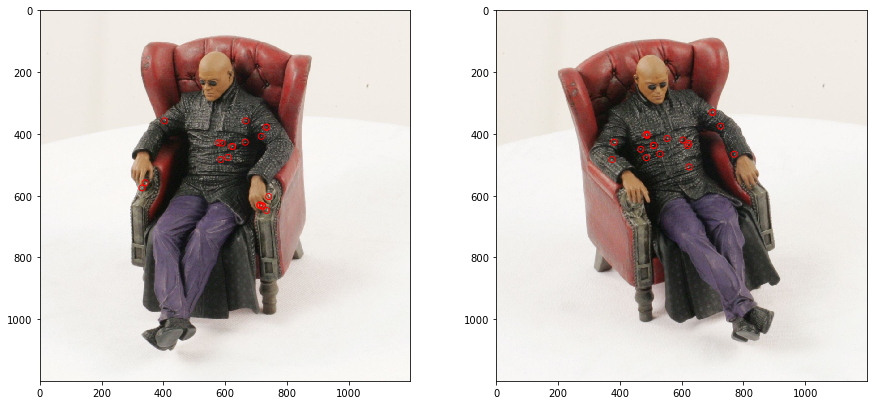

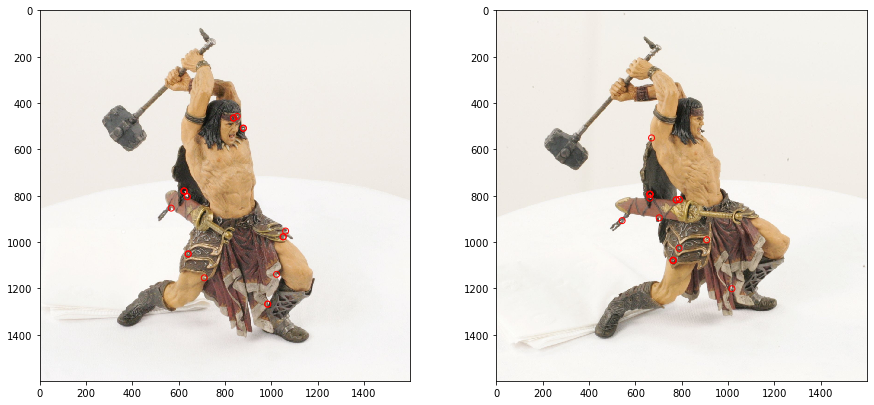

  0%|          | 2/1194 [00:00<01:09, 17.07it/s]

SmoothSTD: 1 WindowSize: 7
image shape (1200, 1200)


100%|██████████| 1194/1194 [01:08<00:00, 17.35it/s]


image shape (1600, 1600)


  0%|          | 2/1194 [00:00<01:07, 17.75it/s]

image shape (1200, 1200)


100%|██████████| 1194/1194 [01:08<00:00, 17.34it/s]


image shape (1600, 1600)


100%|██████████| 1594/1594 [02:01<00:00, 13.10it/s]


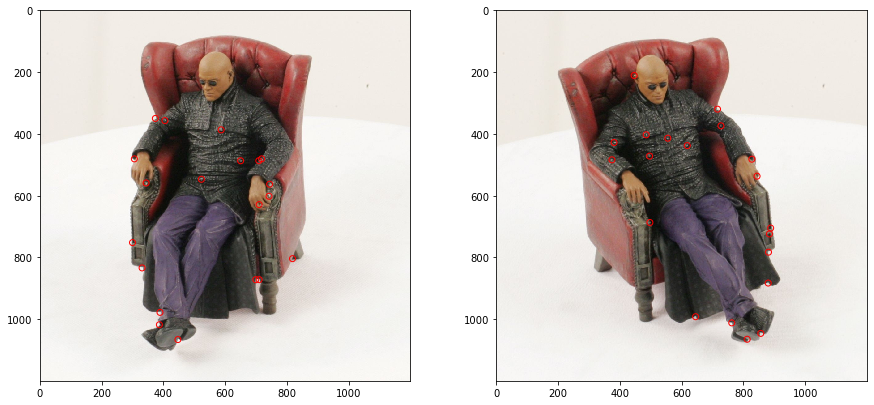

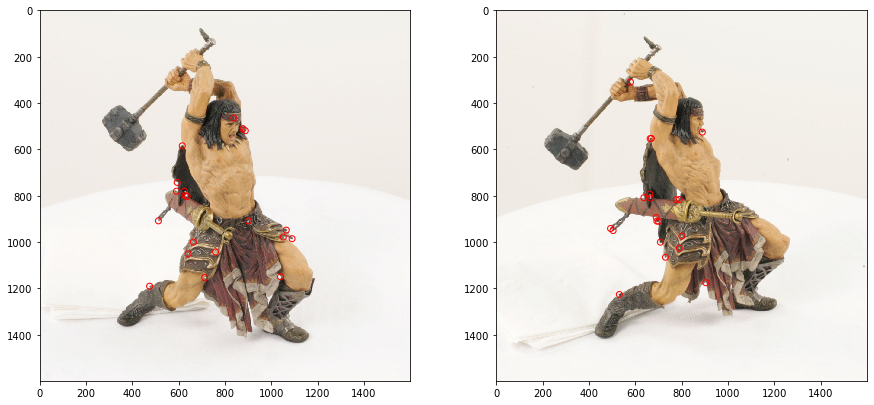

  0%|          | 2/1188 [00:00<01:09, 16.97it/s]

SmoothSTD: 2 WindowSize: 13
image shape (1200, 1200)


100%|██████████| 1188/1188 [01:11<00:00, 16.57it/s]


image shape (1600, 1600)


  0%|          | 2/1188 [00:00<01:10, 16.83it/s]

image shape (1200, 1200)


100%|██████████| 1188/1188 [01:11<00:00, 16.70it/s]


image shape (1600, 1600)


100%|██████████| 1588/1588 [02:06<00:00, 12.52it/s]


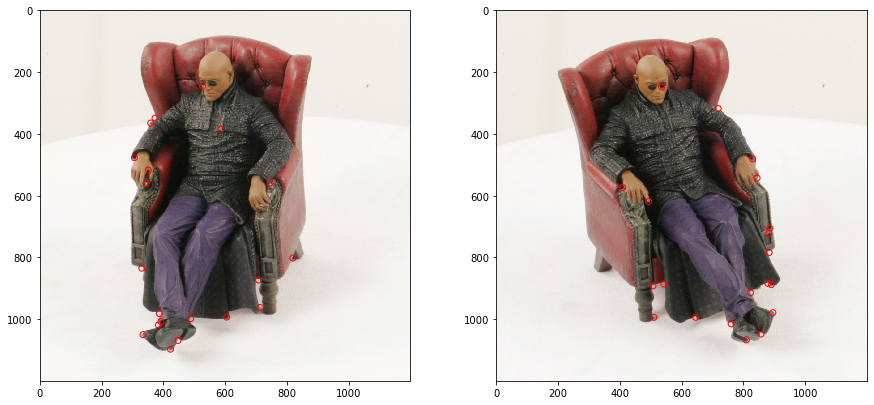

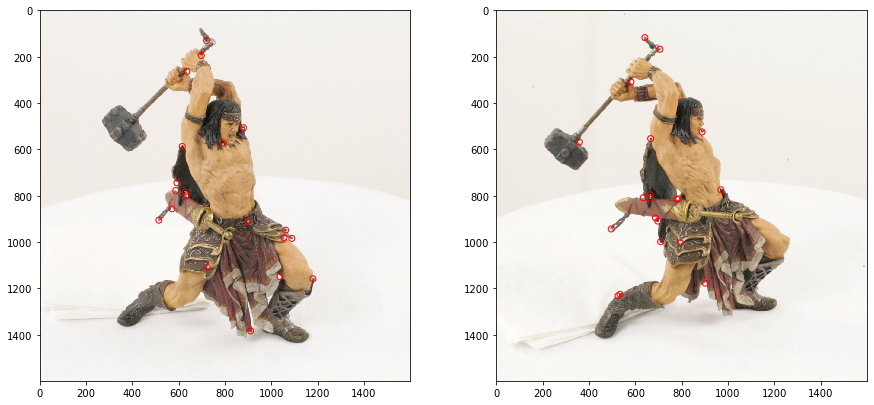

  0%|          | 0/1176 [00:00<?, ?it/s]

SmoothSTD: 4 WindowSize: 25
image shape (1200, 1200)


100%|██████████| 1176/1176 [01:08<00:00, 17.09it/s]


image shape (1600, 1600)


  0%|          | 0/1176 [00:00<?, ?it/s]

image shape (1200, 1200)


100%|██████████| 1176/1176 [01:08<00:00, 17.04it/s]


image shape (1600, 1600)


100%|██████████| 1576/1576 [02:03<00:00, 12.81it/s]


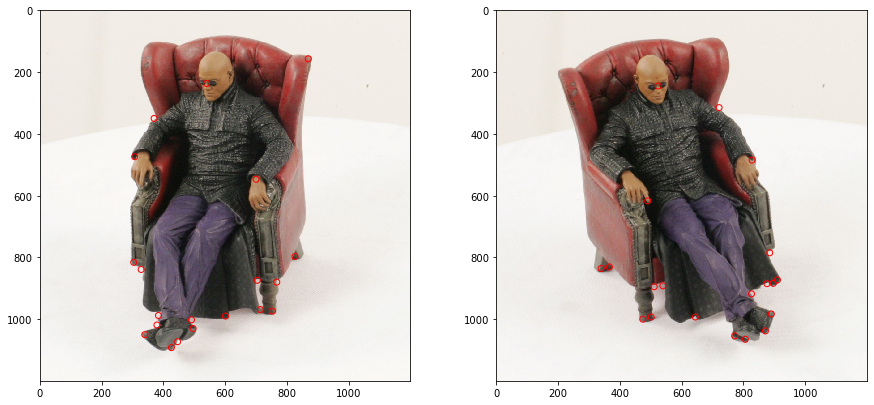

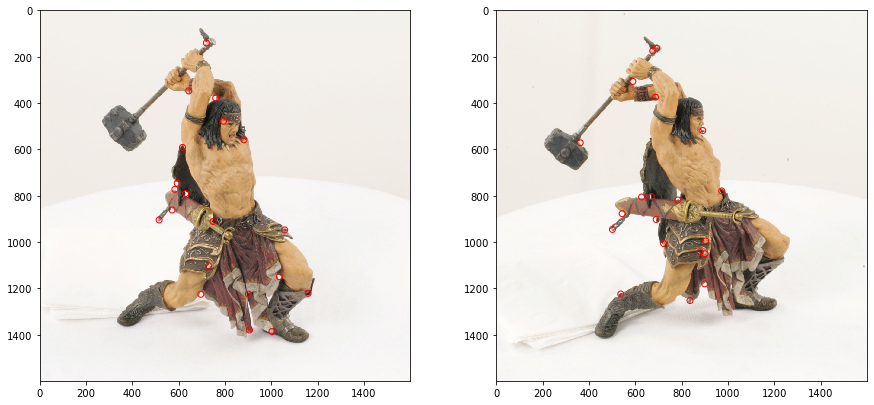

In [4]:
# detect corners on warrior and matrix image sets
# adjust your corner detection parameters here
nCorners = 20
smoothSTDs = [0.5, 1, 2, 4]
imgs_mat = []
imgs_war = []
grayimgs_mat = []
grayimgs_war = []
# Read the two images and convert it to Greyscale

for i in range(2):
    img_mat = imageio.imread('p4/matrix/matrix' + str(i) + '.png')
    imgs_mat.append(img_mat) 
    grayimgs_mat.append(rgb2gray(img_mat))
    # Comment above line and uncomment below line to
    # downsize your image in case corner_detect runs slow in test 
    #grayimgs_mat.append(rgb2gray(img_mat)[::2, ::2])
    # if you unleash the power of numpy you wouldn't need to downsize, it'll be fast
    img_war = imageio.imread('p4/warrior/warrior' + str(i) + '.png')
    imgs_war.append(img_war)
    grayimgs_war.append(rgb2gray(img_war))
    
for smoothSTD in smoothSTDs:
    windowSize = int(6*smoothSTD)
    if windowSize%2==0: windowSize += 1
    crns_mat = []
    crns_war = []
    print ("SmoothSTD:", smoothSTD, "WindowSize:", windowSize)
    for i in range(2):
        crns_mat.append(corner_detect(grayimgs_mat[i], nCorners, smoothSTD,\
                                      windowSize))
        crns_war.append(corner_detect(grayimgs_war[i], nCorners, smoothSTD,\
                                      windowSize))
        
    show_corners_result(imgs_mat, crns_mat) #uncomment this to show your output!
    show_corners_result(imgs_war, crns_war)

### Discuss any trends you see for the detected corners as you change the windowSize and increase the smoothing w.r.t the two pair of images warrior and matrix. 

For the matrix images, as we increase the windowSize and smoothing, the corner detection becomes noticably accurate. At small smoothing coefficient, most of the detected corners are on the shirt of Morpheus. This is most likely because of the wrinkles on the shirt. However, as we increase the smoothing coefficient and the window size, the detected corners correspond to actual corners in the image. This is most likely because with a larger smoothing window, the wrinkles are smoothed out because of their close proximity to each other.

For the warrior image, for small window size, many of the detected corners are clustered near each, whereas for larger window size, the detected corners are more evenly distributed over the body of the warrior. This is mostly like the effect of non maximum suppression.

### NCC (Normalized Cross-Correlation) Matching [2 pts]

Write a function <code>ncc_match</code> that implements the NCC matching algorithm for two input windows.
NCC = $\sum_{i,j}\tilde{W_1} (i,j)\cdot \tilde{W_2} (i,j)$ where $\tilde{W} = \frac{W - \overline{W}}{\sqrt{\sum_{k,l}(W(k,l) - \overline{W})^2}}$ is a mean-shifted and normalized version of the window and $\overline{W}$ is the mean pixel value in the window W.

In [6]:
import numpy as np

def get_win_coors(r_i, c_i, R):
    
    # We assume r_i and c_i are the row index and column index
    # wrt the coodinate system:
    # topleft of matrix is (0, 0)
    # left to right of matrix has increasingly column index
    # top to bottom of matrix has increasingly row index
    
    win_topleft_r = r_i - R
    win_topleft_c = c_i - R

    win_bottomright_r = r_i + R + 1
    win_bottomright_c = c_i + R + 1

    return win_topleft_r, win_topleft_c, win_bottomright_r, win_bottomright_c


def get_win(img, c, R):
    
    # c is the center, where c[0] is col index and c[1] is row index
    
    win_coors = get_win_coors(c[1], c[0], R)
    win = img[
        win_coors[0]:win_coors[2], win_coors[1]:win_coors[3]
    ]

    return win


def get_wtilde(win):
    wbar = np.mean(win)
    denom = np.sqrt(
        np.sum((win - wbar) ** 2)
    )
    wtilde = (win - wbar) / denom
    return wtilde


def ncc_match(img1, img2, c1, c2, R):
    """Compute NCC given two windows.

    Args:
        img1: Image 1.
        img2: Image 2.
        c1: Center (in image coordinate) of the window in image 1.
            c1[0] is col idx, c1[1] is row idx
        c2: Center (in image coordinate) of the window in image 2.
        R: R is the radius of the patch, 2 * R + 1 is the window size

    Returns:
        NCC matching score for two input windows.

    """
    
    """
    Your code here:
    """
    c1_win = get_win(img1, c1, R)
    c2_win = get_win(img2, c2, R)

    c1_wtilde = get_wtilde(c1_win)
    c2_wtilde = get_wtilde(c2_win)

    return np.sum(c1_wtilde * c2_wtilde)

In [7]:
# test NCC match
img1 = np.array([[1, 2, 3, 4], [4, 5, 6, 8], [7, 8, 9, 4]])
img2 = np.array([[1, 2, 1, 3], [6, 5, 4, 4], [9, 8, 7, 3]])
print (ncc_match(img1, img2, np.array([1, 1]), np.array([1, 1]), 1))
# should print 0.8546
print (ncc_match(img1, img2, np.array([2, 1]), np.array([2, 1]), 1))
# should print 0.8457
print (ncc_match(img1, img2, np.array([1, 1]), np.array([2, 1]), 1))
# should print 0.6258

0.8546547739343037
0.8457615282174419
0.6258689611426174


### Naive Matching [4 pts]

Equipped with the corner detector and the NCC matching function, we are ready to start finding correspondances. One naive strategy is to try and find the best match between the two sets of corner points. Write a script that does this, namely, for each corner in image1, find the best match from the detected corners in image2 (or, if the NCC match score is too low, then return no match for that point). You will have to figure out a good threshold (NCCth) value by experimentation. Write a function <code>naive_matching</code> and call it as below. Examine your results for 10, 20, and 30 detected corners in each image. Choose number of detected corners to maximize the number of correct matching pairs. <code>naive_matching</code> will call your NCC matching code. 
**Properly label or mention which output corresponds to which choice of number of corners. Total number of output is 6 images** (3 choice of number of corners for each matrix and warrior), where one image is like below:


Number of Corners: 10
<img src = "fig/dinoMatch.png" alt="dino match" width="800"/>

In [10]:
# TODO:
# For each corner in image1, find the best match from the detected corners in image2 
# (or, if the NCC match score is too low, then return no match for that point). 
# Examine your results for 10, 20, and 30 detected corners in each image. 
# Choose number of detected corners to maximize the number of correct matching pairs.
# Properly label or mention which output corresponds to which choice of number of corners. 
# Total number of output is 6 images

# https://piazza.com/class/k0x7amqoqq920z?cid=388

In [155]:
def naive_matching(img1, img2, corners1, corners2, R, NCCth, distance_ratio_threshold):
    """

    Args:
        img1: Image 1.
        img2: Image 2.
        corners1: Corners in image 1 (nx2)
        corners2: Corners in image 2 (nx2)
        R: NCC matching radius
        NCCth: NCC matching score threshold

    Returns:
        NCC matching result a list of tuple (c1, c2), 
        c1 is the 1x2 corner location in image 1, 
        c2 is the 1x2 corner location in image 2. 

    """
    
    """
    Your code here:
    """
    
    matching = []
    
    cor_coefs = []
    
    for corner1 in corners1:
        
        scores = [ncc_match(img1, img2, corner1, corner2, R) for corner2 in corners2]
        
        cor_coefs.append(scores)
        
    cor_coefs = np.array(cor_coefs)
    mask = np.ones_like(cor_coefs, dtype=np.float32)
    
    while True:
        
        # Find indices of the element with the maximum value in masked correlation coefficient array.
        masked_cor_coefs = np.multiply(cor_coefs, mask)
        
        max_idx = np.argmax(masked_cor_coefs.flatten())
        max_idx = np.unravel_index(max_idx, cor_coefs.shape)
        
        # max_idx is a tuple of float.
        # need to convert it to int.
        max_idx = list(i.astype(np.int) for i in max_idx)
        
        # Store best match value
        max_val = cor_coefs[max_idx[0], max_idx[1]].copy()
        
        # Do not continue if similarity threshold >= maximum value in masked correlation coefficient array.
        if NCCth >= max_val: 
            break
        
        # Temporarily set the value of the element 
        # in the correlation coefficient array to -1
        cor_coefs[max_idx[0], max_idx[1]] = -1.0
        
        # Find the next best match value
        # NOT MASKED
        max_row = np.max(cor_coefs[max_idx[0], :])
        max_col = np.max(cor_coefs[:, max_idx[1]])
        
        next_best_match = np.max((max_row, max_col))
        
        # Set the value of the element back to the original
        cor_coefs[max_idx[0], max_idx[1]] = max_val
        
        # Determine if this is a unique match
        
        # if yes...
        if (1.0 - max_val) < (1.0 - next_best_match) * distance_ratio_threshold:
            
            # store feature match
            matching.append(
                (corners1[max_idx[0]], 
                 corners2[max_idx[1]])
            )
        
        # Set row and column corresponding to best match to False
        mask[max_idx[0], :] = 0.0 # row
        mask[:, max_idx[1]] = 0.0 # col
        
    return matching

In [127]:
# plot matching result
def show_matching_result(img1, img2, matching):
    fig = plt.figure(figsize=(8, 8))
    plt.imshow(np.hstack((img1, img2)), cmap='gray') # two dino images are of different sizes, resize one before use
    for p1, p2 in matching:
        plt.scatter(p1[0], p1[1], s=35, edgecolors='r', facecolors='none')
        plt.scatter(p2[0] + img1.shape[1], p2[1], s=35, edgecolors='r', facecolors='none')
        plt.plot([p1[0], p2[0] + img1.shape[1]], [p1[1], p2[1]])
    plt.show()

In [108]:
# You are free to modify code here, create your helper functions etc.
# detect corners on warrior and matrix sets

nCornersToCorners = dict()

for nCorners in [10, 20, 30]:
    smoothSTD = 2
    windowSize = 13

    # read images and detect corners on images
    imgs_mat = []
    crns_mat = []
    imgs_war = []
    crns_war = []
    
    for i in range(2):
        
        img_mat = imageio.imread('p4/matrix/matrix' + str(i) + '.png')
        imgs_mat.append(rgb2gray(img_mat))

        crns_mat.append(corner_detect(imgs_mat[i], nCorners, smoothSTD, windowSize))

        img_war = imageio.imread('p4/warrior/warrior' + str(i) + '.png')
        imgs_war.append(rgb2gray(img_war))

        crns_war.append(corner_detect(imgs_war[i], nCorners, smoothSTD, windowSize))

    nCornersToCorners[nCorners] = [
        imgs_mat, crns_mat, imgs_war, crns_war
    ]

  0%|          | 2/1188 [00:00<01:11, 16.54it/s]

image shape (1200, 1200)


100%|██████████| 1188/1188 [01:11<00:00, 16.70it/s]


image shape (1600, 1600)


  0%|          | 2/1188 [00:00<01:08, 17.32it/s]

image shape (1200, 1200)


100%|██████████| 1188/1188 [01:10<00:00, 16.79it/s]


image shape (1600, 1600)


  0%|          | 2/1188 [00:00<01:08, 17.33it/s]

image shape (1200, 1200)


100%|██████████| 1188/1188 [01:12<00:00, 16.34it/s]


image shape (1600, 1600)


  0%|          | 2/1188 [00:00<01:07, 17.50it/s]

image shape (1200, 1200)


100%|██████████| 1188/1188 [01:10<00:00, 16.86it/s]


image shape (1600, 1600)


  0%|          | 2/1188 [00:00<01:11, 16.58it/s]

image shape (1200, 1200)


100%|██████████| 1188/1188 [01:10<00:00, 16.77it/s]


image shape (1600, 1600)


100%|██████████| 1588/1588 [02:07<00:00, 12.47it/s]


image shape (1200, 1200)


100%|██████████| 1188/1188 [01:11<00:00, 16.62it/s]


image shape (1600, 1600)


100%|██████████| 1588/1588 [02:07<00:00, 12.50it/s]



Number of Corners: 10
Number of matched corners for matrix 4


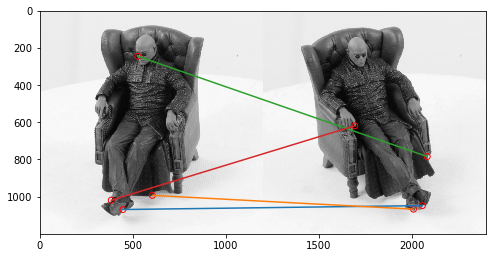

Number of matched corners for warrior 3


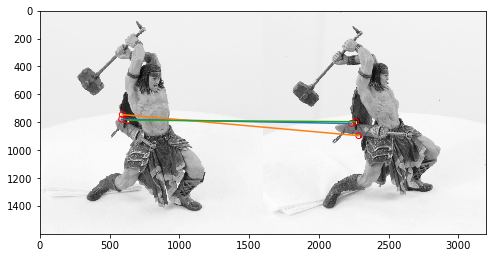



Number of Corners: 20
Number of matched corners for matrix 5


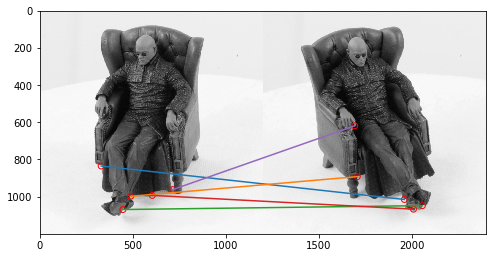

Number of matched corners for warrior 7


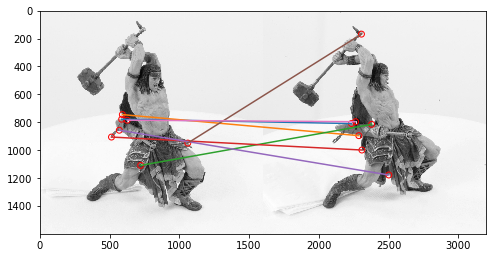



Number of Corners: 30
Number of matched corners for matrix 7


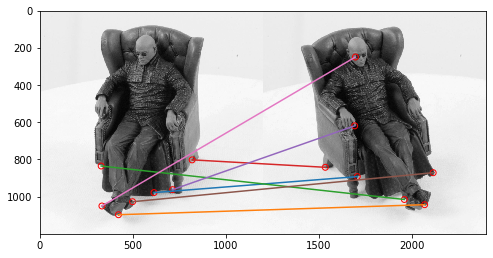

Number of matched corners for warrior 9


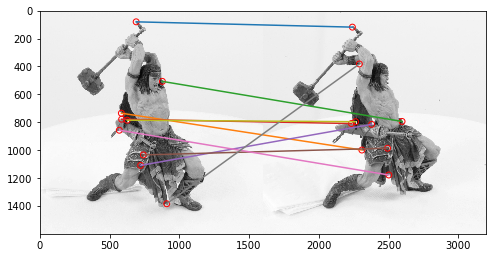

In [158]:
for nCorners in [10, 20, 30]:

    imgs_mat, crns_mat, imgs_war, crns_war = nCornersToCorners[nCorners]

    # match corners
    R = 15
    NCCth = 0.4 # Put your threshold
    distance_ratio_threshold = 0.

    matching_mat = naive_matching(imgs_mat[0]/255, imgs_mat[1]/255, crns_mat[0], crns_mat[1], R, NCCth, distance_ratio_threshold)
    matching_war = naive_matching(imgs_war[0]/255, imgs_war[1]/255, crns_war[0], crns_war[1], R, NCCth, distance_ratio_threshold)

    print()
    print("Number of Corners:", nCorners)
    
    print('Number of matched corners for matrix', len(matching_mat))
    show_matching_result(imgs_mat[0], imgs_mat[1], matching_mat)
    
    print('Number of matched corners for warrior', len(matching_war))
    show_matching_result(imgs_war[0], imgs_war[1], matching_war)
    print()

### Discuss if you are able to find corresponding corners for same pair of images. 

Whether corners are matched correctly depend on the positions of the corners in the image and the number of corners used for matching.

In both the matrix and warrior image, the higher the number of corners used for matching, the more correctly matched corners there are. For example, in the warrior image, the sharp tip of the hammer are only matched correctly when the number of corners in each image is 30 (blue line). 

There are fewer number of matched corners in the matrix image. The matrix image is harder than the warrior image because of the wrinkles on the shirt of Morpheus. The wrinkles can be easily mis-detected as corners since there is sharp change in the color gradient, leading to false positive on corner detections.

There are also wrong matches in the matrix image where it is reasonable that the algorithm makes such mistake. For example, in the 30 corners case, the leg of the chairs are matched (red line), even though they are not the same corner, presumably because the legs look similar.

For the warrior image, we see the phenomena where corners corresponding to skin tone are matched incorrectly, such as corners on the face or the torso. This is likely because the skin tone are similar across different body parts and they occupy large local region, therefore leading to high NCC matching score even though the two corners are on different locations on the body of the warrior. 

However, corners with more distinctive features are matched correctly to the same region, such as the skirt that the warrior wears.

### Choose number of detected corners to maximize the number of correct matching pairs.

From visual inspection, setting nCorners to 30 leads to the highest number of correct matching pairs. 

For example, in the warrior image, the top of the hammer is matched correctedly. The corners on the body armor in the lower part of the body of the warrior is also mostly matched correctly. 

In the matrix image, which is harder, there are fewer correctly matched corners. The correctly matched corners are those for which there are less ambiguity in terms of where the correct matching corners are. For example, the tip of the shoes are matched correctly. 

### Epipolar Geometry [4 pts]

Complete the <code>compute_fundamental</code> function below using 8 point algorithm described in [Lecture 8](http://cseweb.ucsd.edu/classes/fa19/cse252A-a/lec8.pdf). Using the <code>fundamental_matrix</code> function and the corresponding points provided in cor1.npy and cor2.npy, calculate the fundamental matrix for the set of matrix and warrior image. Note that the normalization of the corner point is handled in the <code>fundamental_matrix</code> function.

### Plot Epipolar Lines [5 pts]
Using this fundamental matrix, plot the epipolar lines in both image pairs across all images. For this part you may want to complete the function <code>plot_epipolar_lines</code>. Shown your result for matrix and warrior as the figure below. 
![Dino Epipolar](fig/dinoEpi1.png)
![Dino Epipolar](fig/dinoEpi2.png)

Also, write the script to calculate the epipoles for a given Fundamental matrix and corner point correspondences in the two images.

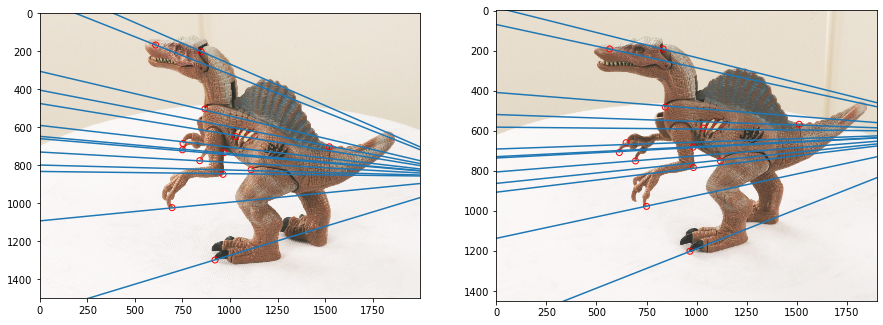

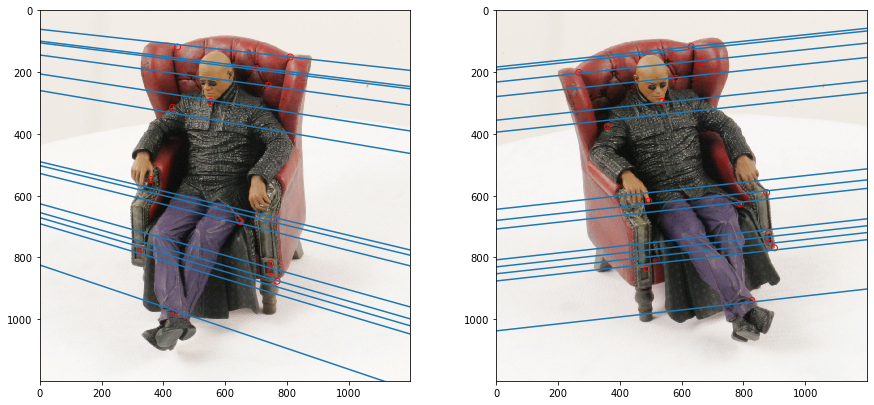

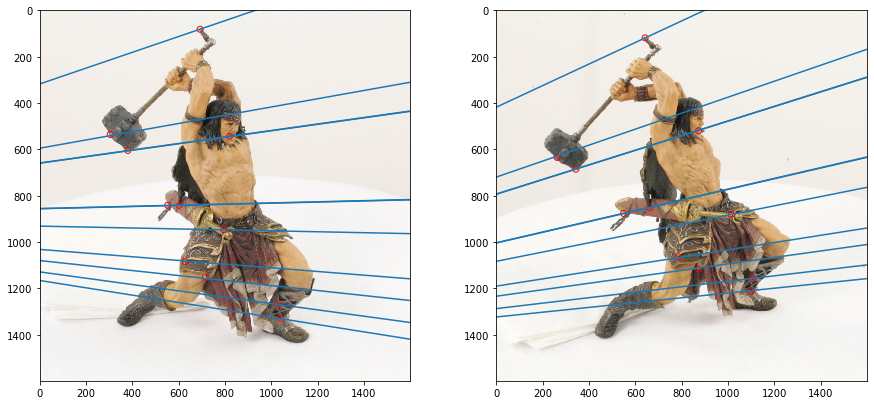

In [101]:
import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt
from scipy.io import loadmat
import matplotlib.lines as mlines


def get_A_row(x_p, y_p, x, y):
    
    return [x_p * x, x_p * y, x_p, y_p * x, y_p * y, y_p, x, y, 1.0]


def compute_fundamental(x1,x2):
    """    Computes the fundamental matrix from corresponding points 
        (x1,x2 3*n arrays) using the 8 point algorithm.
        Each row in the A matrix below is constructed as
        [x'*x, x'*y, x', y'*x, y'*y, y', x, y, 1] 

        Returns:
        Fundamental Matrix (3x3)

    """
    
    """
    Your code here
    """
    n = x1.shape[1]
    if x2.shape[1] != n:
        raise ValueError("Number of points don't match.")
    
    # Compute the A matrix from data
    A = []
    
    for i in range(len(x1[0])):
        
        row = get_A_row(
            x_p=x1[0, i], y_p=x1[1, i],
            x=x2[0, i], y=x2[1, i]
        )
        A.append(row)
        
    A = np.array(A)
    
    # Now we need to solve Af = 0 for f
    U, s, V_T = np.linalg.svd(A)
        
    # f is the last column of V
    f = V_T.T[:, -1]
    
    F = np.reshape(f, (3, 3))
    
    U, s, V_T = np.linalg.svd(F)
    
    # enforce rank 2 constraint by setting the last singular value to 0
    s[-1] = 0.0
    
    F = np.dot(U, np.dot(np.diag(s), V_T))
        
    # return your F matrix
    return F


def fundamental_matrix(x1,x2):
    # Normalization of the corner points is handled here
    n = x1.shape[1]
    if x2.shape[1] != n:
        raise ValueError("Number of points don't match.")

    # normalize image coordinates
    x1 = x1 / x1[2]
    mean_1 = np.mean(x1[:2],axis=1)
    S1 = np.sqrt(2) / np.std(x1[:2])
    T1 = np.array([[S1,0,-S1*mean_1[0]],[0,S1,-S1*mean_1[1]],[0,0,1]])
    x1 = np.dot(T1,x1)
    
    x2 = x2 / x2[2]
    mean_2 = np.mean(x2[:2],axis=1)
    S2 = np.sqrt(2) / np.std(x2[:2])
    T2 = np.array([[S2,0,-S2*mean_2[0]],[0,S2,-S2*mean_2[1]],[0,0,1]])
    x2 = np.dot(T2,x2)

    # compute F with the normalized coordinates
    F = compute_fundamental(x1,x2)
    
    # sanity check that x'T F x = 0
    for pt_idx in range(len(x1[0])):
        v = np.dot(x1[:, pt_idx].T, np.dot(F, x2[:, pt_idx]))
    
        assert np.isclose(v, 0.0, atol=0.3), v

    # reverse normalization
    F = np.dot(T1.T,np.dot(F,T2))

    return F/F[2,2]



def newline(p1, p2, ax):
    # https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    return l

    
    
def plot_epipolar_lines(img1,img2, cor1, cor2):
    """Plot epipolar lines on image given image, corners

    Args:
        img1: Image 1.
        img2: Image 2.
        cor1: Corners in homogeneous image coordinate in image 1 (3xn)
        cor2: Corners in homogeneous image coordinate in image 2 (3xn)

    """
    
    # https://piazza.com/class/k0x7amqoqq920z?cid=398
    # We need to calculate the fundamental matrix F,
    # then plot the epipolar line using Fx
        
    # cor is an array of shape 3 by 13
    # containing 13 corners.
    # The first row is the x coordinate (column idx)
    # The second row is the y coordinate (row idx)
    # The third row is all 1, indicating homogenous coordinates.
    
    F = fundamental_matrix(cor1, cor2)
    
    # Plot the corners
    fig = plt.figure(figsize=(15, 15))
    ax1 = fig.add_subplot(221)
    ax1.imshow(img1, cmap='gray')
    ax1.scatter(cor1[0], cor1[1], s=36, edgecolors='r', facecolors='none')

    ax2 = fig.add_subplot(222)
    ax2.imshow(img2, cmap='gray')
    ax2.scatter(cor2[0], cor2[1], s=36, edgecolors='r', facecolors='none')

    # plot the lines
    for pt_idx in range(len(cor1[0])):
        
        c = cor1[:, pt_idx]

        l = np.dot(c.T, F)

        # l is [a, b, c]
        # the line is ax + by + c = 0
        # y = (- ax - c) / b
        x = np.array([0, img2.shape[1]])
        y = (- l[0] * x - l[2]) / l[1]

        ax2.add_line(newline([x[0], y[0]], [x[1], y[1]], ax2))
    
    for pt_idx in range(len(cor2[0])):
        
        c = cor2[:, pt_idx]

        l = np.dot(F, c)

        # l is [a, b, c]
        # the line is ax + by + c = 0
        # y = (- ax - c) / b
        x = np.array([0, img1.shape[1]])
        y = (- l[0] * x - l[2]) / l[1]

        ax1.add_line(newline([x[0], y[0]], [x[1], y[1]], ax1))

    plt.show()    
    
# replace images and corners with those of matrix and warrior
imgids = ["dino", "matrix", "warrior"]
# imgids = ["dino"]

for imgid in imgids:
    I1 = imageio.imread("./p4/"+imgid+"/"+imgid+"0.png")
    I2 = imageio.imread("./p4/"+imgid+"/"+imgid+"1.png")

    cor1 = np.load("./p4/"+imgid+"/cor1.npy")
    cor2 = np.load("./p4/"+imgid+"/cor2.npy")
    plot_epipolar_lines(I1,I2,cor1,cor2)

### Image Rectification [5 pts]
 An interesting case for epipolar geometry occurs when two images are parallel to each other. In this case, there is no rotation component involved between the two images and the essential matrix is $\texttt{E}=[\boldsymbol{T_{x}}]\boldsymbol{R}=[\boldsymbol{T_{x}}]$. Also if you observe the epipolar lines $\boldsymbol{l}$ and $\boldsymbol{l^{'}}$ for parallel images, they are horizontal and consequently, the corresponding epipolar lines share the same vertical coordinate. Therefore the process of making images parallel becomes useful while discerning the relationships between corresponding points in images.
 Rectifying a pair of images can also be done for uncalibrated camera images (i.e. we do not require the camera matrix of intrinsic parameters). Using the fundamental matrix we can find the pair of epipolar lines $\boldsymbol{l_i}$ and $\boldsymbol{l^{'}_i}$ for each of the correspondences. The intersection of these lines will give us the respective epipoles $\boldsymbol{e}$ and $\boldsymbol{e^{'}}$.  Now to make the epipolar lines to be parallel we need to map the epipoles to infinity. Hence , we need to find a homography that maps the epipoles to infinity. The method to find the homography has been implemented for you. You can read more about the method used to estimate the homography in the paper "Theory and Practice of Projective Rectification" by Richard Hartley.
 ![Image Rectification Setup](image_rectification.png)
 Using the compute_epipoles function from the previous part and the given compute_matching_homographies function, find the rectified images and plot the parallel epipolar lines using the plot_epipolar_lines function from above. You need to do this for both the matrix and the warrior images. A sample output will look as below:
 ![sample rectification](Sample_rectification.png)

In [238]:
# MODIFIED FROM HW2

# convert points from euclidian to homogeneous
def to_homog(points):
    # write your code here
    
    W = 1.0
    
    num_points = points.shape[1]
        
    # adding W to each point coordinate
    out = np.concatenate((points, [[W] * num_points]), axis=0)
        
    return out


# convert points from homogeneous to euclidian
def from_homog(points_homog):
    # write your code here
    
    points_homog = points_homog / points_homog[-1]
    
    return points_homog[:-1,:]


def computeH(source_points, target_points):
    # returns the 3x3 homography matrix such that:
    # np.matmul(H, source_points) = target_points
    # where source_points and target_points are expected to be in homogeneous
    # make sure points are 3D homogeneous
    assert source_points.shape[0]==3 and target_points.shape[0]==3
    #Your code goes here
    
    x, y = source_points, target_points

    # obtain the matrix mapping from source points to the intermediate space
    lam = np.linalg.solve(x[:,:3], x[:,3])
    
    H_inv_x = x[:,:3] * lam
    
    # obtain the matrix mapping from target points to the intermediate space
    lam = np.linalg.solve(y[:,:3], y[:,3])
        
    H_inv_y = y[:,:3] * lam
    
    # obtain matrix from from source to target points
    H_mtx = np.matmul(H_inv_y, np.linalg.inv(H_inv_x))

    return H_mtx


def warp2(source_img, source_points, target_points, target_size):

    assert target_size[2]==source_img.shape[2]
    
    tgt_num_row = target_size[0]
    tgt_num_col = target_size[1]
    
    src_num_row = source_img.shape[0]
    src_num_col = source_img.shape[1]
        
    H = computeH(to_homog(target_points), to_homog(source_points))
    
    target_img = np.ones(target_size)
    
    # x_idx indicates the col idx
    # y_idx indicates the row idx
    
    # for each pixel in the target image...
    for x_idx in trange(target_img.shape[1]):
        for y_idx in range(target_img.shape[0]):

            # find the corresponding pixel in the source image
            homog_pt = to_homog(np.array([[x_idx, y_idx]]).T)
            mapped_pt = np.matmul(H, homog_pt)

            # replace the pixel in the target image
            # with the corresponding pixel in the source image
            # if the corresponding pixel is not out of bound
            pt = from_homog(mapped_pt)
            pt = np.round(pt).astype(np.int)
            
            if not 0 < pt[0, 0] < src_num_col or not 0 < pt[1, 0] < src_num_row:
                continue
                
            target_img[y_idx][x_idx] = source_img[pt[1, 0], pt[0, 0]]

    target_img = target_img.astype(np.int)
    return target_img

/home/quan/miniconda3/envs/cse252a/lib/python3.7/site-packages/ipykernel_launcher.py:61: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  0%|          | 10/2000 [00:00<00:48, 41.30it/s]

e1 [2.35949610e+03 8.60754379e+02 1.00000000e+00]
e2 [2.48180647e+03 6.05806030e+02 1.00000000e+00]
H1 e1 [-25814.      0.      0.]
H2 e2 [1536.    0.    0.]


100%|██████████| 1900/1900 [00:54<00:00, 34.86it/s]


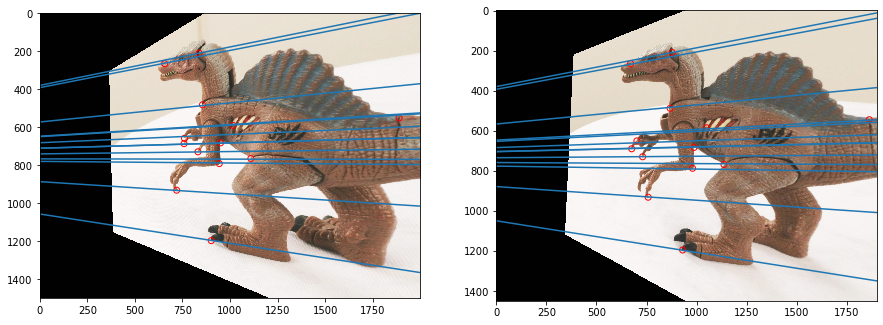

  1%|          | 10/1200 [00:00<00:26, 45.34it/s]

e1 [-3.37028671e+03 -3.12818282e+02  1.00000000e+00]
e2 [ 1.01332165e+05 -1.04037515e+04  1.00000000e+00]
H1 e1 [4081379.       0.       0.]
H2 e2 [101331.     -0.     -0.]


100%|██████████| 1200/1200 [00:29<00:00, 40.04it/s]


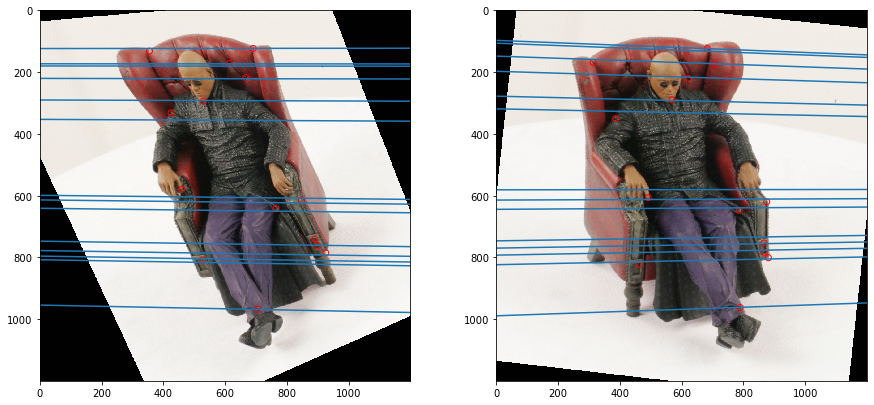

  0%|          | 4/1600 [00:00<00:46, 34.07it/s]

e1 [-1.69691257e+03  8.97422748e+02  1.00000000e+00]
e2 [-2.50388412e+03  1.58326449e+03  1.00000000e+00]
H1 e1 [-204245.       0.      -0.]
H2 e2 [-3395.     0.    -0.]


100%|██████████| 1600/1600 [00:50<00:00, 31.40it/s]


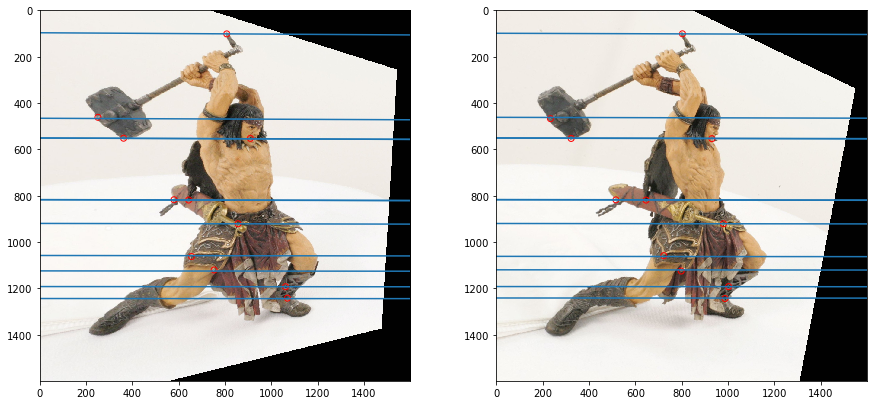

In [241]:
def compute_matching_homographies(e2, F, im2, points1, points2):
    
    '''This function computes the homographies to get the rectified images
    input:
    e2--> epipole in image 2
    F--> the Fundamental matrix (Think about what you should be passing F or F.T!)
    im2--> image2
    points1 --> corner points in image1
    points2--> corresponding corner points in image2
    output:
    H1--> Homography for image 1
    H2--> Homography for image 2
    '''
    # calculate H2
    width = im2.shape[1]
    height = im2.shape[0]

    T = np.identity(3)
    T[0][2] = -1.0 * width / 2
    T[1][2] = -1.0 * height / 2

    e = T.dot(e2)
    e1_prime = e[0]
    e2_prime = e[1]
    if e1_prime >= 0:
        alpha = 1.0
    else:
        alpha = -1.0

    R = np.identity(3)
    R[0][0] = alpha * e1_prime / np.sqrt(e1_prime**2 + e2_prime**2)
    R[0][1] = alpha * e2_prime / np.sqrt(e1_prime**2 + e2_prime**2)
    R[1][0] = - alpha * e2_prime / np.sqrt(e1_prime**2 + e2_prime**2)
    R[1][1] = alpha * e1_prime / np.sqrt(e1_prime**2 + e2_prime**2)

    f = R.dot(e)[0]
    G = np.identity(3)
    G[2][0] = - 1.0 / f

    H2 = np.linalg.inv(T).dot(G.dot(R.dot(T)))

    # calculate H1
    e_prime = np.zeros((3, 3))
    e_prime[0][1] = -e2[2]
    e_prime[0][2] = e2[1]
    e_prime[1][0] = e2[2]
    e_prime[1][2] = -e2[0]
    e_prime[2][0] = -e2[1]
    e_prime[2][1] = e2[0]

    v = np.array([1, 1, 1])
    M = e_prime.dot(F) + np.outer(e2, v)

    points1_hat = H2.dot(M.dot(points1.T)).T
    points2_hat = H2.dot(points2.T).T

    W = points1_hat / points1_hat[:, 2].reshape(-1, 1)
    b = (points2_hat / points2_hat[:, 2].reshape(-1, 1))[:, 0]

    # least square problem
    a1, a2, a3 = np.linalg.lstsq(W, b)[0]
    HA = np.identity(3)
    HA[0] = np.array([a1, a2, a3])

    H1 = HA.dot(H2).dot(M)
    return H1, H2



def compute_epipole(F):
    '''
    This function computes the epipoles for a given fundamental matrix 
    and corner point correspondences
    input:
    F--> Fundamental matrix
    output:
    e1--> corresponding epipole in image 1
    e2--> epipole in image2
    '''
    
    # To find e2, we solve for e' in F e' = 0
    U, s, V_T = np.linalg.svd(F)
        
    # e is the last column of V
    e2 = V_T.T[:, -1]
    
    # normalize so that e lines on the image plane
    e2 = e2 / e2[-1]

    # To find e1, we solve for e in F^T e = 0
    U, s, V_T = np.linalg.svd(F.T)
        
    # e is the last column of V
    e1 = V_T.T[:, -1]
    
    # normalize so that e lines on the image plane
    e1 = e1 / e1[-1]

    return e1, e2
    

def image_rectification(im1,im2,points1,points2):
    '''this function provides the rectified images along with the new corner points as outputs for a given pair of 
    images with corner correspondences
    input:
    im1--> image1
    im2--> image2
    points1--> corner points in image1
    points2--> corner points in image2
    outpu:
    rectified_im1-->rectified image 1
    rectified_im2-->rectified image 2
    new_cor1--> new corners in the rectified image 1
    new_cor2--> new corners in the rectified image 2
    '''

    # Using the fundamental matrix we can find the pair of epipolar lines. The intersection of these lines will give us the respective epipoles . 
    F = fundamental_matrix(points1, points2)
    
    e1, e2 = compute_epipole(F)    
    
    # Now to make the epipolar lines to be parallel we need to map the epipoles to infinity. Hence , we need to find a homography that maps the epipoles to infinity. 
    H1, H2 = compute_matching_homographies(e2, F.T, im2, points1.T, points2.T)
    
    print('e1', e1)
    print('e2', e2)
    
    # For sanity check, these should roughly be (1, 0, 0) in homogenous coordinates
    print('H1 e1', np.round(np.dot(H1, e1)))
    print('H2 e2', np.round(np.dot(H2, e2)))
    
    # Using the compute_epipoles function from the previous part and the given compute_matching_homographies function, 
    # find the rectified images and 
    # plot the parallel epipolar lines using the plot_epipolar_lines function from above
    
    # If we use H1 and H2 to transform the two images directly
    # then the transformed images will have empty holes in them. (Similar phenomena observed in homework2).
    # To prevent the holes from happening, we need to find the inverse homography.
    
    # For image 1, to find the inverse homography, we use H1 to map the corners point to the transformed images.
    # And use the corner points and the new corners as the target and the source points 
    # to find the inverse homography
    
    new_cor1 = np.matmul(H1, points1) 
    new_cor1 = new_cor1 / new_cor1[-1]
        
    rectified_im1 = warp2(
        im1, 
        from_homog(points1),
        from_homog(new_cor1),
        im1.shape
    )
    
    new_cor2 = np.matmul(H2, points2)
    new_cor2 = new_cor2 / new_cor2[-1]
    
    rectified_im2 = warp2(
        im2, 
        from_homog(points2),
        from_homog(new_cor2),
        im2.shape
    )
    
    return rectified_im1, rectified_im2, new_cor1, new_cor2

imgids = ["dino", "matrix", "warrior"]
# imgids = ["dino"]

imgids_to_rec_imgs = dict()

for imgid in imgids:
    I1 = imageio.imread("./p4/"+imgid+"/"+imgid+"0.png")
    I2 = imageio.imread("./p4/"+imgid+"/"+imgid+"1.png")

    cor1 = np.load("./p4/"+imgid+"/cor1.npy")
    cor2 = np.load("./p4/"+imgid+"/cor2.npy")
        
    rectified_im1, rectified_im2, new_cor1, new_cor2 = image_rectification(I1, I2, cor1, cor2)
    
    plot_epipolar_lines(rectified_im1, rectified_im2, new_cor1, new_cor2)
    
    imgids_to_rec_imgs[imgid] = [rectified_im1, rectified_im2, new_cor1, new_cor2]

### Matching Using epipolar geometry[4 pts]

We will now use the epipolar geometry constraint on the rectified images and updated corner points to build a better matching algorithm. First, detect 10 corners
in Image1. Then, for each corner, do a linesearch along the corresponding parallel epipolar line in Image2.
Evaluate the NCC score for each point along this line and return the best match (or no match if all
scores are below the NCCth). R is the radius (size) of the NCC patch in the code below.  You do not
have to run this in both directions. Show your result as in the naive matching part. Execute this for the warrior and matrix images (**Total two outputs images**).

In [398]:
nCorners = 10

# Choose your threshold
NCCth = 0.7

#decide the NCC matching window radius
R = 10

In [399]:
# plot matching result
def display_correspondence(img1, img2, corrs):
    """Plot matching result on image pair given images and correspondences

    Args:
        img1: Image 1.
        img2: Image 2.
        corrs: Corner correspondence

    """
    
    """
    Your code here.
    You may refer to the show_matching_result function
    """
    matching = corrs
    
    fig = plt.figure(figsize=(8, 8))
    plt.imshow(np.hstack((img1, img2)), cmap='gray') # two dino images are of different sizes, resize one before use
    
    for p1, p2 in matching:
        plt.scatter(p1[0], p1[1], s=35, edgecolors='r', facecolors='none')
        plt.scatter(p2[0] + img1.shape[1], p2[1], s=35, edgecolors='r', facecolors='none')
        plt.plot([p1[0], p2[0] + img1.shape[1]], [p1[1], p2[1]])
        
    plt.show()

    
def correspondence_matching_epipole(img1, img2, corners1, F, R, NCCth):
    """Find corner correspondence along epipolar line.

    Args:
        img1: Image 1.
        img2: Image 2.
        corners1: Detected corners in image 1.
        F: Fundamental matrix calculated using given ground truth corner correspondences.
        R: NCC matching window radius.
        NCCth: NCC matching threshold.
    
    
    Returns:
        Matching result to be used in display_correspondence function

    """
    """
    Your code here.
    """

    # First, detect 10 corners in Image1. 
    
    # Then, for each corner, do a linesearch along the corresponding parallel epipolar line in Image2.
    # Evaluate the NCC score for each point along this line and return the best match (or no match if all scores are below the NCCth). 
    
    # R is the radius (size) of the NCC patch in the code below.  
    # Show your result as in the naive matching part. Execute this for the warrior and matrix images (**Total two outputs images**).
    
    # corners1 is an array of n by 2 
    # where each row corresponds to 1 detected corners.
    # Each detector corner has form (col_index, row_index).
    # i.e. (x, y) in image coordinate
    
    corners1 = np.append(corners1, np.ones((len(corners1), 1)), axis=1)
    
    matching = []

    for pt_idx in range(len(corners1)):
    
        corner = corners1[pt_idx]
        c1 = corner[:2].astype(np.int)

        l = np.dot(F, corner)

        # line is of the form ax + by + c = 0
        NCC_scores = []
        coors = []

        # Start searching in the line R column away from the image boundary
        for x_coor in range(R, img2.shape[1]-R):

            y_coor = (- l[0] * x_coor - l[2]) / l[1]

            c2 = np.array([x_coor, y_coor])
            c2 = np.round(c2).astype(np.int)

            score = ncc_match(img1, img2, c1, c2, R)

            NCC_scores.append(score)
            coors.append(c2)

        if np.max(NCC_scores) < NCCth:
            print('No Match')
            continue

        best_match_idx = np.argmax(NCC_scores)
        best_match_coor = coors[best_match_idx]
        
        matching.append((c1, best_match_coor))
        
    return matching


In [400]:
# For matrix

# rectified_im1,rectified_im2,new_cor1,new_cor2 = image_rectification(I1,I2,cor1,cor2)
rectified_im1, rectified_im2, new_cor1, new_cor2 = imgids_to_rec_imgs['matrix']
F_new = fundamental_matrix(new_cor1, new_cor2)

# detect corners using corner detector here, store in corners1

# corners1 is an array of n by 2 
# where each row corresponds to 1 detected corners.
# Each detector corner has form (row_index, col_index).
corners1 = corner_detect(rgb2gray(rectified_im1), nCorners, smoothSTD, windowSize)

image shape (1200, 1200)


No Match
No Match
No Match
No Match
No Match


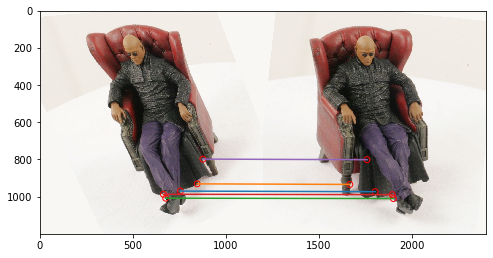

In [401]:
# Replace the black region in the images with the background
wbg_rec_im1 = rectified_im1.copy()
im1_bg = np.mean(rectified_im1[600:800, 200:300], axis = (0, 1))

for row_i in range(wbg_rec_im1.shape[0]):
    for col_i in range(wbg_rec_im1.shape[1]):
        
        pixel = wbg_rec_im1[row_i, col_i]
        
        if pixel[0] == pixel[1] == pixel[2] == 1.0:
            wbg_rec_im1[row_i, col_i] = im1_bg
    
    
wbg_rec_im2 = rectified_im2.copy()

for row_i in range(wbg_rec_im2.shape[0]):
    for col_i in range(wbg_rec_im2.shape[1]):
        
        pixel = wbg_rec_im2[row_i, col_i]
        
        if pixel[0] == pixel[1] == pixel[2] == 1.0:
            wbg_rec_im2[row_i, col_i] = im1_bg

corrs = correspondence_matching_epipole(wbg_rec_im1, wbg_rec_im2, corners1, F_new, R, NCCth)

display_correspondence(wbg_rec_im1, wbg_rec_im2, corrs)


In [402]:
# For warrior
# rectified_im3, rectified_im4, new_cor3, new_cor4 = image_rectification(I3,I4,cor3,cor4)
rectified_im3, rectified_im4, new_cor3, new_cor4 = imgids_to_rec_imgs['warrior']

F_new2 = fundamental_matrix(new_cor3, new_cor4)

corners2 = corner_detect(rgb2gray(rectified_im3), nCorners, smoothSTD, windowSize, ignore_range_col=150, ignore_range_row=100)

image shape (1600, 1600)


No Match
No Match
No Match


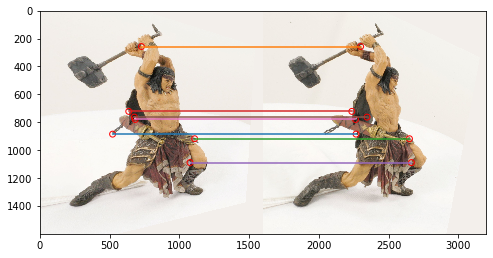

In [403]:
# Replace the black region in the images with the background
wbg_rec_im3 = rectified_im3.copy()
im_bg = np.mean(wbg_rec_im3[600:800, 200:300], axis = (0, 1))

for row_i in range(wbg_rec_im3.shape[0]):
    for col_i in range(wbg_rec_im3.shape[1]):
        
        pixel = wbg_rec_im3[row_i, col_i]
        
        if pixel[0] == pixel[1] == pixel[2] == 1.0:
            wbg_rec_im3[row_i, col_i] = im_bg
    
    
wbg_rec_im4 = rectified_im4.copy()

for row_i in range(wbg_rec_im4.shape[0]):
    for col_i in range(wbg_rec_im4.shape[1]):
        
        pixel = wbg_rec_im4[row_i, col_i]
        
        if pixel[0] == pixel[1] == pixel[2] == 1.0:
            wbg_rec_im4[row_i, col_i] = im_bg

            
corrs = correspondence_matching_epipole(wbg_rec_im3, wbg_rec_im4, corners2, F_new2, R, NCCth)

display_correspondence(wbg_rec_im3, wbg_rec_im4, corrs)